Let's implement some ECG signal stuff in this Collab. We'll use the MIT-BIH cardiac arrythmia dataset to get started.
https://www.physionet.org/content/mitdb/1.0.0/

Note that the signals were digitized @ 360 samples per second 11-bit resolution over a 10 mV range.

There's also this qtdb that we have access to. For now let's just use mitdb
https://physionet.org/content/qtdb/1.0.0/


Things to Implement
1. PQRST wave detectors
2. FFT - features
3. Some classifiers -- CNN, CNN+LSTM, PCA + SVM, Bag of Features, Decision tree.
4. Hugging face - image analysis -- plot analyzer.

In [1]:
# this gives access to your whole drive and google account
# dont put anything in here that youre not using to code
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# wfdb stands for waveform database - use it for reading physiological signals
# documentation is available @ https://wfdb.readthedocs.io/en/latest/wfdb.html
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.


In [13]:
# do the imports
import os
import glob
import wfdb
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

Number of files  12
signal shape  (650000, 2)
field keys  dict_keys(['fs', 'sig_len', 'n_sig', 'base_date', 'base_time', 'units', 'sig_name', 'comments'])
signal array  [[-0.995 -0.47 ]
 [-0.995 -0.47 ]
 [-0.995 -0.47 ]
 [-0.995 -0.47 ]
 [-0.995 -0.47 ]
 [-0.995 -0.47 ]
 [-0.995 -0.47 ]
 [-1.015 -0.47 ]
 [-0.985 -0.455]
 [-0.985 -0.45 ]]
fields dictionary  {'fs': 360, 'sig_len': 650000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V1'], 'comments': ['51 F 1129 654 x2', 'Pronestyl', 'The PVCs are uniform.']}


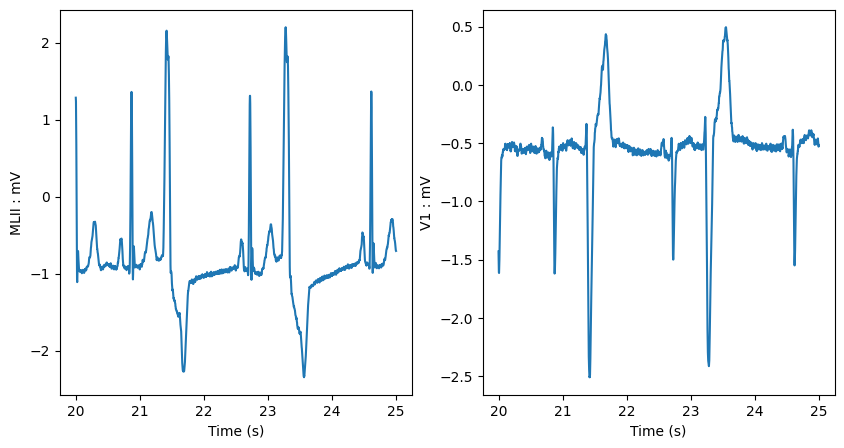

In [39]:
def MIT_BIH_reader():
  hdir = '/content/drive/My Drive/PublicHeartDatasets/mit-bih-arrhythmia-database-p-wave-annotations-1.0.0/'
  # get all the file names from the data set
  hea = sorted(glob.glob(os.path.join(hdir,'*.hea')))
  hea = [hh.replace('.hea','') for hh in hea]

  # wfdb does not need the extension - it figures all that out apparently
  print('Number of files ', len(hea))


  SigNumber = 5
  # wfdb get signals
  signals, fields = wfdb.rdsamp(hea[SigNumber], )
  # print(type(signals))
  # print(type(fields))

  # signals is a numpy array, and fields is a dict
  print('signal shape ', signals.shape)
  print('field keys ', fields.keys())

  # print the array real quick
  print('signal array ', signals[0:10,:]) # signal
  print('fields dictionary ', fields) # notes about the signals

  # Note that the signals were digitized @ 360 samples per second
  # 11-bit resolution over a 10 mV range. so if you want
  fs = fields['fs'] # sampling frequency - should be 360
  t_win = 5
  T1 = 20
  T2 = t_win + T1
  time_ = np.linspace(T1,T2, t_win*fs)

  # signal is already in milivolts ok.
  # plotting

  fig, axes = plt.subplots(1,2, figsize=(10, 5))
  for i in range(2):
    axes[i].plot(time_, signals[T1*fs:T2*fs,i])
    axes[i].set_xlabel('Time (s)')
    # so signame here is the lead -- the view across the heart that this signal
    # gives us.
    axes[i].set_ylabel(fields['sig_name'][i] + ' : '+fields['units'][i])

  '''
  There are some p wave annotations from the physionet set. ok but
  '''
  # annotation = wfdb.rdann(hea[SigNumber],'pwave',
  #                    return_label_elements=['symbol','label_store','description'],
  #                    summarize_labels = True)

  # print(annotation.symbol) # get the unique symbols
  # print(annotation.description)

  # print(len(annotation.symbol))
  # print(set(annotation.symbol))

MIT_BIH_reader()


In [40]:
plt.close()

Now we have something that can just open signal files. we probably want some denoising stuff first. Then we can start setting windows around the different peaks. -- Peak detection with old fashioned AI approahces.  

Think about using this model for the visual question answering task.
https://huggingface.co/google/pix2struct-chartqa-base


In [ ]:
# # import transformers
# from transformers import BertTokenizer, BertForMaskedLM